# Exercise 6.2
## Interpolation
In this task, we implement a simple NN to learn a complicated function.

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

layers = keras.layers

### Generation of data

In [ ]:
def some_complicated_function(x):
    return (
        (np.abs(x)) ** 0.5
        + 0.1 * x
        + 0.01 * x ** 2
        + 1
        - np.sin(x)
        + 0.5 * np.exp(x / 10.0)
        ) / (0.5 + np.abs(np.cos(x)))

Let's simulate the train data

In [ ]:
N_train = 10 ** 4  # number of training samples
# Note: "[:, np.newaxis]" reshapes array to (N,1) as required by our DNN (we input one feature per sample)
xtrain = np.random.uniform(-10, 10, N_train)[:, np.newaxis]
ytrain = some_complicated_function(xtrain) + np.random.standard_normal(xtrain.shape)  # train data includes some noise

In [ ]:
print("xtrain.shape", xtrain.shape)
print("ytrain.shape", ytrain.shape)

xtrain.shape (10000, 1)
ytrain.shape (10000, 1)


Simulate test data

In [ ]:
N_test = 10000  # number of testing samples
xtest = np.linspace(-10, 10, N_test)
ytest = some_complicated_function(xtest)

In [ ]:
print("xtest.shape", xtest.shape)
print("ytest.shape", ytest.shape)

xtest.shape (10000,)
ytest.shape (10000,)


### Define Model

Define the number of nodes, the number of layers, and choose an activation function.
Use `keras.regularizers` to use parameter norm penalties or add a dropout layer via `layers.Dropout(fraction)`.

You may use the skeleton below:

In [ ]:
nb_nodes = 100
nb_layers = 6
activation = "ReLU"

model = keras.models.Sequential(name="1Dfit")
model.add(layers.Dense(nb_nodes, activation=activation, input_dim=xtrain.shape[1]))  # first layer # specify input_dim only for very first layer

for i in range(1,nb_layers):
  model.add(layers.Dense(nb_nodes, activation = activation))
  
model.add(layers.Dense(1))  # final layer

print(model.summary())

Model: "1Dfit"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101   

Here, the users use KERAS linrary to create a DDN, that is define the number of input, layers, neurons and activation function.

The "summary" command allows the user to have a visual on the network he has created.

### Compile the model (set an objective and choose an optimizer)

Choose an optimizer from `keras.optimizers`, e.g., `adam = keras.optimizers.Adam(learning_rate=0.001)`.

Further, choose the correct objective (loss) for this <b>regression task</b>.

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="MSE", optimizer=adam)

Here, the suers can choose the optimizer use for training the network, that is the training algorithm used to optimize the weight. Here the Adam optmizer is used and correspond to Stochastic gradient descent weight optimization method.

Moreover, the user can choose the loss function used in the DNN training. Here the standard mean square error is used.

### Train the model

Train the network for a couple of epochs and save the model several times in between.

In [ ]:
epochs = 100
save_period = 20 # after how many epochs the model should be saved?

chkpnt_saver = keras.callbacks.ModelCheckpoint("weights-{epoch:02d}.hdf5", save_weights_only=True, save_freq=save_period)

results = model.fit(
    xtrain,
    ytrain,
    batch_size=64,
    epochs=epochs,
    verbose=1,
    callbacks=[chkpnt_saver]
    )

Epoch 1/100
157/157 [==============================] - 6s 6ms/step - loss: 4.7437
Epoch 2/100
157/157 [==============================] - 1s 6ms/step - loss: 3.1264
Epoch 3/100
157/157 [==============================] - 1s 6ms/step - loss: 2.7617
Epoch 4/100
157/157 [==============================] - 1s 6ms/step - loss: 2.5348
Epoch 5/100
157/157 [==============================] - 1s 6ms/step - loss: 2.4213
Epoch 6/100
157/157 [==============================] - 1s 6ms/step - loss: 2.3586
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3418
Epoch 8/100
157/157 [==============================] - 1s 6ms/step - loss: 2.3409
Epoch 9/100
157/157 [==============================] - 1s 6ms/step - loss: 2.3893
Epoch 10/100
157/157 [==============================] - 1s 5ms/step - loss: 2.3188
Epoch 11/100
157/157 [==============================] - 1s 6ms/step - loss: 2.2487
Epoch 12/100
157/157 [==============================] - 1s 5ms/step - loss: 2.1671
Epoch 13/100


Here the user can choose the number of epochs and the batch size. The epoch is number of time the training algorithm will go through all the dataset, and the batch size is the number of sample used before updating the weight value, so the number of sample that are passed through the network at once, before weight update.

Finally, the save period is also specified here.

Compare the performance of the model during the training. You may use the skeleton below:

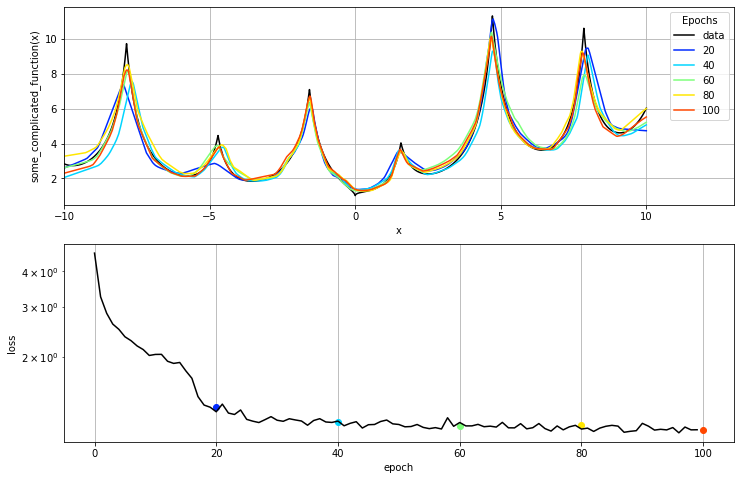

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 8))

ax1.plot(xtest, ytest, color="black", label="data")
saved_epochs = range(save_period, epochs + 1, save_period)

colors = [plt.cm.jet((i + 1) / float(len(saved_epochs) + 1)) for i in range(len(saved_epochs))]

for i, epoch in enumerate(saved_epochs):
    model.load_weights("weights-{epoch:02d}.hdf5".format(epoch=epoch))
    ypredict = model.predict(xtest).squeeze()
    ax1.plot(xtest.squeeze(), ypredict, color=colors[i], label=epoch)
    ax2.plot(epoch, results.history["loss"][epoch - 1], color=colors[i], marker="o")

ax1.set(xlabel="x", ylabel="some_complicated_function(x)", xlim=(-10, 13), title="")
ax1.grid(True)
ax1.legend(loc="upper right", title="Epochs")

ax2.plot(results.history["loss"], color="black")
ax2.set(xlabel="epoch", ylabel="loss")
ax2.grid(True)
ax2.semilogy()

plt.show()

Here, the results of the training are nicely plotted.

In the plot1 the real function is plotted to be able to visually see the accuracy prediction of the DDN. One can observe that, naturally, prediction accuracy (that is curve fitting) increase with the number of epochs as weights are further optimized until reaching a more or less constant loss.

In the plot2, the evolution of the loss after each epoch is shown, so we can see the initial decrease in loss and then a stabilization with small fluctuation. To avoid overfitting, the training should be stoped not too long after reaching the "constant" minimal loss value.